## Berlin rent prediction

In [1]:
# 📦 Aufgabe 1: Bibliotheken importieren & Plot-Stil setzen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from IPython.display import display

# --- ANPASSUNGEN FÜR KOMPAKTE ANZEIGE ---

# 1. Pandas-Tabellen kompakter darstellen (weniger Spalten nebeneinander)
pd.set_option('display.max_columns', 15) # Zeigt max. 15 Spalten an, bevor umgebrochen wird

# 2. Seaborn/Matplotlib-Plots anpassen
sns.set(style='whitegrid', palette='muted', font_scale=0.9) # Kleinere Schrift in den Plots
plt.rcParams['figure.dpi'] = 80 # Geringere DPI für kompaktere Plots (Standard ist oft 72 oder 96)
plt.rcParams['figure.figsize'] = (8, 5) # Eine Standard-Größe für alle Plots festlegen (optional)


In [2]:
# 📁 Aufgabe 2: Daten laden
try:
    df = pd.read_csv('../../data/immo_data.csv')
    print("✅ Datensatz erfolgreich geladen.")
except FileNotFoundError:
    print("❌ Fehler: 'immo_data.csv' nicht gefunden. Stelle sicher, dass die Datei im Ordner 'data/' liegt.")


✅ Datensatz erfolgreich geladen.


In [3]:
# 🔍 Aufgabe 3: Überblick über die Daten
print("\n🧾 --- Datenübersicht ---")
df.info()

print("\n📋 Vorschau der ersten 5 Zeilen:")
# Bei df.head() wenden wir die gleiche Logik an, um die Warnung auch hier zu vermeiden.
# Wir wählen nur die numerischen Spalten aus, die nicht komplett leer sind.
df_head_numeric = df.head().select_dtypes(include=np.number).dropna(axis=1, how='all')
display(df.head().style.set_caption("Erste 5 Zeilen").background_gradient(cmap='Blues', subset=df_head_numeric.columns))


print("\n📊 Statistische Zusammenfassung:")
# KORREKTUR: Wir entfernen Spalten, die nur NaN-Werte enthalten, BEVOR wir den Stil anwenden.
# Dadurch wird die RuntimeWarning verhindert.
df_described_clean = df.describe().dropna(axis=1, how='all')
display(df_described_clean.style.background_gradient(cmap='YlGnBu'))



🧾 --- Datenübersicht ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces      

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.000000,central_heating,ONE_YEAR_FREE,nan,False,False,6,4.620000,10.000000,840.000000,1965.000000,96107057,1.000000,oil,False,Nordrhein_Westfalen,True,2.000000,595.000000,244,86.000000,Dortmund,well_kept,normal,nan,Schüruferstraße,Schüruferstraße,False,4,ground_floor,44269,4.000000,181.400000,1.000000,3.000000,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnung befindet sich in einem gepflegten 8-Familienhaus. Aufgrund der Hanglage bietet sich ein unverbaubarer Blick ins Grüne.,"Die Wohnung ist mit Laminat ausgelegt. Das Badezimmer ist gefliest und verfügt über eine Wannendusche. Neue weiße Zimmertüren, ein Fliesenspiegel in der Küche und Fußleisten wurden kürzlich eingebaut. Zur Wohnung gehört ein 10 m großer Keller. Eine Garage kann optional mitgemietet werden.",nan,nan,nan,nan,nan,May19
1,Rheinland_Pfalz,134.000000,self_contained_central_heating,ONE_YEAR_FREE,nan,False,True,8,3.470000,10.000000,nan,1871.000000,111378734,2.000000,gas,False,Rheinland_Pfalz,False,1.000000,800.000000,nan,89.000000,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,nan,False,5,ground_floor,67459,3.000000,nan,nan,nan,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,"Alles neu macht der Mai – so kann es auch für Sie in 2019 sein! Genießen Sie das „reine“ Gefühl und die „Unberührtheit“, die diese Wohnung nach der Kernsanierung bietet. Sie verfügt über eine Wohnfläche von ca. 89 m² und einen äußerst gelungenen Grundriss. Aufgeteilt ist die Wohnung in einen großzügigen Wohn-Essbereich, eine Küche, ein Schlafzimmer, ein Kinder- oder Arbeitszimmer, ein Bad, ein Gäste-WC und einen Flur. Von der Küche aus haben Sie direkten Zugang zum Balkon, der zum gemütlichen Verweilen und Entspannen einlädt. Das Badezimmer ist ausgestattet mit Dusche, Toilette, Waschbecken und praktischem Handtuchheizkörper. Zudem gibt es hier jeweils einen Anschluss für die Waschmaschine und für den Trockner. Sämtliche Räume in der Wohnung sind lichtdurchflutet, freundlich und einladend, verstärkt durch die weißen, doppelt verglasten Alufenster und die weißen Wände. Die Böden sind mit pflegeleichtem Vinyl-Boden und Fliesen ausgelegt und somit auch für Allergiker geeignet. Beheizt wird die Wohnung mittels einer neuen, energieeffizienten Gas-Etagenheizung der Firma Vaillant. Im Keller steht allen Mietern ein gemeinschaftlicher Raum zur Verfügung, der für zusätzlichen Stauraum sorgt. Abgerundet wird dieses tolle Angebot durch 2 Stellplätze, auf dem Sie Ihre Fahrzeuge stets sicher und ohne Parkplatzsuche parken können. Wir werden uns bemühen Ihre Anfrage so rasch als möglich zu beantworten, bitte haben Sie jedoch Verständnis, wenn dies 1-2 Werktage in Anspruch nehmen kann!",nan,nan,nan,2019.000000,nan,nan,May19
2,Sachsen,255.000000,floor_heating,ONE_YEAR_FREE,10.000000,True,True,8,2.720000,2.400000,1300.000000,2019.000000,113147523,1.000000,nan,False,Sachsen,True,9.000000,965.000000,4,83.800000,Dresden,first_time_use,sophisticated,nan,Turnerweg,Turnerweg,True,6,apartment,1097,3.000000,nan,3.000000,4.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,"Der Neubau entsteht im Herzen der Dresdner Neustadt. Das Baugrundstück befindet sich inmitten einer sehr gefragten Lage. Nicht nur die zentrale Lage und die schnelle öffentliche Verkehrsanbindung durch den zu Fuß erreichbaren Bahnhof, wie auch Nahverkehrsanbindung, sondern auch die Architektur werden diesen Neubaukomplex 


📊 Statistische Zusammenfassung:


,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.000000,268850.000000,267018.000000,235492.000000,228333.000000,211805.000000,268850.000000,93052.000000,211805.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.000000,9.791958,3.389001,28.804928,901.331522,1966.400590,106969670.362946,1.327634,3.714544,694.129432,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.000000,6.408399,1.964874,16.337151,33238.333822,46.992207,12500933.414895,8.361403,2.738134,19536.017580,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.000000,0.000000,-12.330000,1.000000,0.000000,1000.000000,28871743.000000,0.000000,1.000000,0.000000,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.000000,6.000000,2.000000,10.000000,469.800000,1950.000000,106691034.000000,1.000000,1.000000,338.000000,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.000000,9.000000,3.390000,40.000000,650.000000,1973.000000,111158376.000000,1.000000,3.000000,490.000000,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.000000,13.000000,4.570000,40.000000,985.000000,1996.000000,113768759.500000,1.000000,5.000000,799.000000,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.000000,121.000000,14.920000,100.000000,15751535.000000,2090.000000,115711743.000000,2241.000000,9.000000,9999999.000000,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [4]:
# 🗺️ Aufgabe 4: Filterung auf Berlin
berlin_df = df[(df['regio2'] == 'Berlin') | (df['regio3'] == 'Berlin')]

if berlin_df.empty:
    print("\n⚠️ Keine Daten für Berlin gefunden.")
else:
    print(f"\n🏙️ Gefundene Einträge für Berlin: {len(berlin_df)}")

    # KORREKTUR: Wir identifizieren die numerischen Spalten, die in den ersten 5 Zeilen
    # nicht komplett leer sind, und wenden den Stil nur auf dieses "Subset" an.
    berlin_head_numeric = berlin_df.head().select_dtypes(include=np.number).dropna(axis=1, how='all')
    display(berlin_df.head().style.set_caption("Beispielhafte Berliner Einträge").background_gradient(cmap='PuBu', subset=berlin_head_numeric.columns))



🏙️ Gefundene Einträge für Berlin: 10406


,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
45,Berlin,320.000000,central_heating,nan,nan,False,True,10,4.990000,nan,1140.000000,nan,115671495,1.000000,nan,True,Berlin,False,nan,820.000000,63,77.000000,Berlin,nan,nan,negotiable,Metropolitan Park,Metropolitan_Park,True,6,ground_floor,13591,3.000000,nan,0.000000,3.000000,3,False,3,Berlin,Staaken_Spandau,"Diese attraktive EG-Wohnung kann ab sofort bezogen werden. Bei diesem Angebot handelt es sich um eine großzügige und komfortable 3-Zimmer Wohnung im Erdgeschoss eines komplett sanierten und modernisierten Gebäudes eines ehemaligen und unter Denkmalschutz stehenden Gebäudes. Die ca. 77m2 gro-ße Wohnung ist ausgesprochen großzügig, hell und gut geschnitten und verfügt über eine geschmackvolle luxuriöse Ausstattung. Der Fußboden in der gesamten Wohnung ist mit Eichen-Parkett versehen. Über einen Eingangsbereich mit Garderobennische betritt man die Wohnung. Von hier aus gelangt man in das elegante Wohnzimmer (ca 28m2) sowie auf die Ter-rasse (ca 13m2). Der Küchenbereich der Wohnung ist mit einer modernen und voll-ausgestatteten Einbauküche versehen. Die monatlichen Kosten hierfür betragen 50,00€. Das schöne Schlafzimmer (ca 12m2) ist funktional und großzügig geschnitten und verfügt zusätzlich über einen Ankleidebereich. Ein weiteres Zimmer (Arbeits- oder Gästezimmer) befindet sich neben dem Wohnzimmer und ist durch eine Schiebetür getrennt. Die Wohnung ist mit einem großen, modernen Badezimmer mit ebenerdiger Dusche ausgestattet. Sowohl Fliessn als auch Objekte und Armaturen sind von hochwertiger Qualität. Der Anschluss für eine Waschmaschine ist im Badezimmer vorhanden. In allen Räumen liegt sowohl Telefon- als auch digitaler Kabelanschluss. Die Kosten für Telefon, Internet und Strom sind nicht in den Nebenkosten enthalten. Die Wohnung ist ab sofort bezugsfertig. Die nachstehenden Konditionen sind freibleibend. Nettokaltmiete: € 820,00 Zzgl. Nebenkosten: € 230,00 Einbauküche: € 50,00 Stellplatz Nr. 34: €. 40,00 Gesamtmiete: € 1.140,00 Kaution:",nan,nan,nan,nan,nan,nan,Feb20
61,Berlin,79.000000,central_heating,ONE_YEAR_FREE,nan,False,False,17,7.350000,40.000000,955.000000,1918.000000,113359456,nan,gas,False,Berlin,False,1.000000,808.000000,11,62.630000,Berlin,refurbished,nan,negotiable,Börnestraße,Börnestraße,False,6,ground_floor,13086,2.000000,100.400000,0.000000,3.000000,2,False,3,Berlin,Weißensee_Weißensee,"Suchen Sie eine 2-Zimmerwohnung in Weißensee? Willkommen in der Börnestraße 11! Die Wohnung befindet sich im Vorderhaus im Erdgeschoss eines Altbaus und verfügt über zwei separate Zimmer (WG-geeignet), ein modernes Wannenbad mit Fenster und eine Küche mit Spüle und Herd (auf Wunsch). Es wird ein unbefristeter Mietvertrag mit einer Mindestmietlaufzeit von 15 Monaten angeboten (inkl. Kündigungsfrist). Die Staffelmiete beträgt 3,5 % jährlich, bezieht sich auf die Nettokaltmiete und ist auf 10 Jahre begrenzt.",Zusammengefasst bietet die Wohnung: + Vollständig Saniert! + 2 Zimmer (WG-geeignet) + Bad mit Wanne und Fenster + Küche mit Herd und Spüle + Zentralheizung,68.000000,nan,nan,nan,nan,Oct19
77,Berlin,150.000000,floor_heating,ONE_YEAR_FREE,nan,True,True,15,6.600000,40.000000,1300.000000,2019.000000,113704695,1.000000,district_heating,True,Berlin,True,9.000000,1150.000000,27,46.400000,Berlin,first_time_use,luxury,no,Stallschreiberstraße,Stallschreiberstraße,True,7,apartment,10179,2.000000,nan,3.000000,5.000000,2,False,2,Berlin,Mitte_Mitte,"Dieses lu

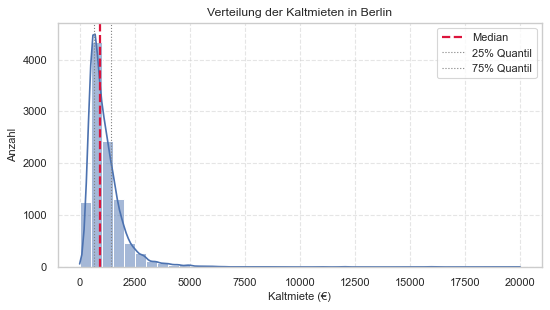

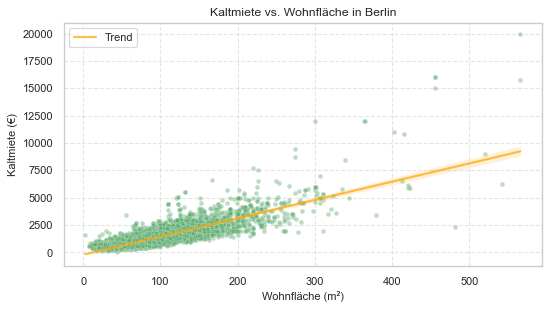

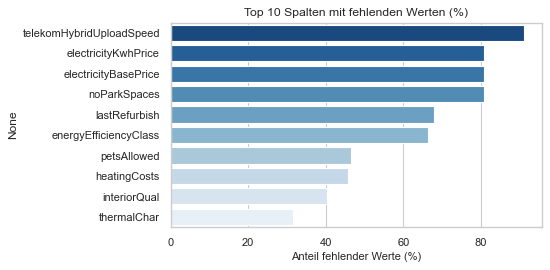


🧩 Fehlende Werte (Top 10):
telekomHybridUploadSpeed    9488
electricityKwhPrice         8411
electricityBasePrice        8411
noParkSpaces                8393
lastRefurbish               7070
energyEfficiencyClass       6917
petsAllowed                 4838
heatingCosts                4769
interiorQual                4208
thermalChar                 3275
dtype: int64


In [5]:
# 📈 Aufgabe 5: Explorative Datenanalyse (EDA)

# --- Kaltmieten-Verteilung (dieser Teil ist bereits korrekt) ---
plt.figure(figsize=(7, 4))
sns.histplot(berlin_df['baseRent'], bins=40, kde=True, color="#4C72B0")
plt.title('Verteilung der Kaltmieten in Berlin', fontsize=11)
plt.xlabel('Kaltmiete (€)', fontsize=10)
plt.ylabel('Anzahl', fontsize=10)
plt.axvline(berlin_df['baseRent'].median(), color='crimson', ls='--', lw=2, label='Median')
plt.axvline(berlin_df['baseRent'].quantile(0.25), color='grey', ls=':', lw=1, label='25% Quantil')
plt.axvline(berlin_df['baseRent'].quantile(0.75), color='grey', ls=':', lw=1, label='75% Quantil')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Scatterplot Kaltmiete vs Wohnfläche (dieser Teil ist bereits korrekt) ---
plt.figure(figsize=(7, 4))
sns.scatterplot(x='livingSpace', y='baseRent', data=berlin_df, alpha=0.4, color="#55A868", edgecolor='w', s=18)
sns.regplot(x='livingSpace', y='baseRent', data=berlin_df, scatter=False, color='orange', line_kws={'lw':2, 'alpha':0.7}, label='Trend')
plt.title('Kaltmiete vs. Wohnfläche in Berlin', fontsize=11)
plt.xlabel('Wohnfläche (m²)', fontsize=10)
plt.ylabel('Kaltmiete (€)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# --- Fehlende Werte – Barplot (hier ist die Korrektur) ---
missing = berlin_df.isnull().mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(7, 3.5))

# KORRIGIERTE ZEILE: hue=missing.index und legend=False hinzugefügt.
sns.barplot(x=missing.values * 100, y=missing.index, hue=missing.index, palette="Blues_r", legend=False)

plt.title("Top 10 Spalten mit fehlenden Werten (%)", fontsize=11)
plt.xlabel("Anteil fehlender Werte (%)", fontsize=10)
plt.tight_layout()
plt.show()

print("\n🧩 Fehlende Werte (Top 10):")
print(berlin_df.isnull().sum().sort_values(ascending=False).head(10))


In [6]:
# 🛠️ Aufgabe 6: Feature Engineering & Preprocessing (FutureWarning-frei!)
features = ['livingSpace', 'yearConstructed', 'balcony', 'hasKitchen', 'garden',
            'condition', 'interiorQual', 'lift']

target = 'baseRent'

berlin_model_df = berlin_df[features + [target]].copy()

# Fehlende numerische Werte mit Median füllen (warnungsfrei)
for col in ['livingSpace', 'yearConstructed']:
    berlin_model_df[col] = berlin_model_df[col].fillna(berlin_model_df[col].median())

# Fehlende boolesche Werte mit False füllen und als int kodieren (warnungsfrei)
for col in ['balcony', 'hasKitchen', 'garden']:
    berlin_model_df[col] = berlin_model_df[col].fillna(False)
    berlin_model_df[col] = berlin_model_df[col].astype(int)

# 🔁 yearConstructed in Alter der Immobilie (age) umrechnen
berlin_model_df['age'] = 2025 - berlin_model_df['yearConstructed']
features = [f if f != 'yearConstructed' else 'age' for f in features]

# 🆕 Feature: Neubau-Indikator
berlin_model_df['isNew'] = (berlin_model_df['age'] <= 5).astype(int)
features.append('isNew')

# 🆕 Feature: PLZ → Bezirk (One-Hot) und isEastBerlin
if 'postalCode' in berlin_df.columns:
    berlin_model_df['plz'] = berlin_df['postalCode'].astype(str)

    # 🆕 Feature: isEastBerlin anhand PLZ
    berlin_model_df['isEastBerlin'] = berlin_model_df['plz'].str[:2].astype(int).apply(lambda x: 1 if 10 <= x <= 13 else 0)
    features.append('isEastBerlin')

    # Beispielhaftes Mapping PLZ → Bezirk
    plz_to_bezirk = {
        '10115': 'Mitte', '10117': 'Mitte', '10119': 'Mitte', '10178': 'Mitte',
        '10243': 'Friedrichshain-Kreuzberg', '10245': 'Friedrichshain-Kreuzberg',
        '10247': 'Friedrichshain-Kreuzberg', '10249': 'Friedrichshain-Kreuzberg',
        '10315': 'Lichtenberg', '10317': 'Lichtenberg', '10318': 'Treptow-Köpenick',
        '10319': 'Lichtenberg', '10365': 'Lichtenberg', '10367': 'Lichtenberg', '10369': 'Lichtenberg',
        '10405': 'Pankow', '10407': 'Pankow', '10409': 'Pankow',
        '10435': 'Pankow', '10437': 'Pankow', '10439': 'Pankow',
        '10551': 'Mitte', '10553': 'Charlottenburg-Wilmersdorf', '10555': 'Mitte',
        '10557': 'Mitte', '10559': 'Mitte', '10585': 'Charlottenburg-Wilmersdorf',
        '10587': 'Charlottenburg-Wilmersdorf', '10589': 'Charlottenburg-Wilmersdorf',
        '10623': 'Charlottenburg-Wilmersdorf', '10625': 'Charlottenburg-Wilmersdorf',
        '10627': 'Charlottenburg-Wilmersdorf', '10629': 'Charlottenburg-Wilmersdorf',
        '10707': 'Charlottenburg-Wilmersdorf', '10709': 'Charlottenburg-Wilmersdorf',
        '10711': 'Charlottenburg-Wilmersdorf', '10713': 'Charlottenburg-Wilmersdorf',
        '10715': 'Charlottenburg-Wilmersdorf', '10717': 'Charlottenburg-Wilmersdorf',
        '10719': 'Charlottenburg-Wilmersdorf', '10777': 'Tempelhof-Schöneberg',
        '10779': 'Tempelhof-Schöneberg', '10781': 'Tempelhof-Schöneberg',
        '10783': 'Tempelhof-Schöneberg', '10785': 'Mitte', '10787': 'Mitte',
        '10789': 'Charlottenburg-Wilmersdorf', '10823': 'Tempelhof-Schöneberg',
        '10825': 'Tempelhof-Schöneberg', '10827': 'Tempelhof-Schöneberg',
        '10829': 'Tempelhof-Schöneberg', '10961': 'Friedrichshain-Kreuzberg',
        '10963': 'Friedrichshain-Kreuzberg', '10965': 'Friedrichshain-Kreuzberg',
        '10967': 'Friedrichshain-Kreuzberg', '10969': 'Friedrichshain-Kreuzberg',
        '10997': 'Friedrichshain-Kreuzberg', '10999': 'Friedrichshain-Kreuzberg'
    }

    berlin_model_df['bezirk'] = berlin_model_df['plz'].map(plz_to_bezirk)

    if berlin_model_df['bezirk'].notna().any():
        bezirk_dummies = pd.get_dummies(berlin_model_df['bezirk'], prefix='bezirk')
        berlin_model_df = pd.concat([berlin_model_df, bezirk_dummies], axis=1)
        berlin_model_df.drop(columns=['bezirk'], inplace=True)
        features += list(bezirk_dummies.columns)

# Zielvariable darf nicht fehlen
berlin_model_df = berlin_model_df.dropna(subset=[target])

print(f"\n📦 Daten nach Preprocessing: {len(berlin_model_df)} Einträge")
print(berlin_model_df.info())



📦 Daten nach Preprocessing: 10406 Einträge
<class 'pandas.core.frame.DataFrame'>
Index: 10406 entries, 45 to 268829
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   livingSpace      10406 non-null  float64
 1   yearConstructed  10406 non-null  float64
 2   balcony          10406 non-null  int64  
 3   hasKitchen       10406 non-null  int64  
 4   garden           10406 non-null  int64  
 5   condition        8138 non-null   object 
 6   interiorQual     6198 non-null   object 
 7   lift             10406 non-null  bool   
 8   baseRent         10406 non-null  float64
 9   age              10406 non-null  float64
 10  isNew            10406 non-null  int64  
dtypes: bool(1), float64(4), int64(4), object(2)
memory usage: 904.4+ KB
None


In [7]:
# ➕ Zusätzliche Features: condition, interiorQual, lift

# 1. Fehlende Werte behandeln
berlin_model_df['condition'] = berlin_model_df['condition'].fillna('unbekannt')
berlin_model_df['interiorQual'] = berlin_model_df['interiorQual'].fillna('unbekannt')
# lift ist vollständig vorhanden

# 2. One-Hot-Encoding für condition & interiorQual
condition_dummies = pd.get_dummies(berlin_model_df['condition'], prefix='cond')
interior_dummies = pd.get_dummies(berlin_model_df['interiorQual'], prefix='interior')

# 3. Anhängen und Originalspalten entfernen
berlin_model_df = pd.concat([berlin_model_df, condition_dummies, interior_dummies], axis=1)
berlin_model_df.drop(columns=['condition', 'interiorQual'], inplace=True)

# 4. lift in int umwandeln
berlin_model_df['lift'] = berlin_model_df['lift'].astype(int)

# 5. Featureliste erweitern
# (falls du deine Featureliste nicht automatisch aus df.columns erzeugst)
features += ['lift'] + list(condition_dummies.columns) + list(interior_dummies.columns)


In [8]:
# 🚨 Ausreißererkennung mit IQR-Methode
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Auf wichtige numerische Spalten anwenden
for col in ['livingSpace', 'baseRent']:
    berlin_model_df = remove_outliers_iqr(berlin_model_df, col)

print(f"✅ Daten nach Ausreißer-Entfernung: {berlin_model_df.shape[0]} Einträge")

# NEU: Log-Transformation zur Normalisierung der Verteilung
# =================================================================
# Wir wenden np.log1p an (log(1+x)), um mit Nullwerten umgehen zu können.
# Dies hilft linearen Modellen und verbessert oft die Performance.

berlin_model_df['baseRent'] = np.log1p(berlin_model_df['baseRent'])
berlin_model_df['livingSpace'] = np.log1p(berlin_model_df['livingSpace'])

print("✅ Zielvariable 'baseRent' und 'livingSpace' wurden log-transformiert.")

# WICHTIG: Spätere Vorhersagen müssen zurücktransformiert werden!
# y_pred_original = np.expm1(y_pred_log)
# =================================================================


✅ Daten nach Ausreißer-Entfernung: 9597 Einträge
✅ Zielvariable 'baseRent' und 'livingSpace' wurden log-transformiert.


In [9]:
# 📈 Multikollinearität prüfen mit VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X-Daten vorbereiten (alle numerischen Features)
X_vif = berlin_model_df.drop(columns=[target])  # baseRent ist die Zielgröße

# Falls noch boolsche Features vorhanden sind, sicherstellen, dass alles numerisch ist
X_vif = X_vif.select_dtypes(include=[np.number]).dropna()

# VIF-Datenframe berechnen
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Ausgabe
print("\n🔍 Variance Inflation Factor (VIF):")
print(vif_data.sort_values(by="VIF", ascending=False))



🔍 Variance Inflation Factor (VIF):
           Feature        VIF
1  yearConstructed  99.133542
6              age   3.423289
5             lift   1.315782
2          balcony   1.168239
0      livingSpace   1.072581
3       hasKitchen   1.062540
4           garden   1.039306
7            isNew   1.015022


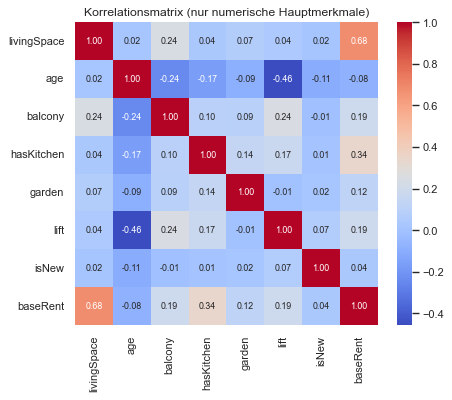

In [10]:
# 💡 Aufgabe 7: Kompakte Korrelationsmatrix – nur numerische Hauptmerkmale
plt.figure(figsize=(6, 5))  # kleineres Format

# Manuell ausgewählte numerische Kernfeatures (ohne Dummy-Spalten)
numerical_features = [
    'livingSpace',
    'age',
    'balcony',
    'hasKitchen',
    'garden',
    'lift',
    'isNew',
    'baseRent'# Zielwert zur Orientierung
]

# Korrelationsmatrix berechnen
corr = berlin_model_df[numerical_features].corr()

# Heatmap plotten
sns.heatmap(
    corr, annot=True, cmap='coolwarm', fmt='.2f', square=True,
    annot_kws={"size": 8}
)
plt.title('Korrelationsmatrix (nur numerische Hauptmerkmale)', fontsize=11)
plt.tight_layout()
plt.show()

In [11]:
# 🤖 Aufgabe 8: Modelltraining (Lineare Regression)
X = berlin_model_df.drop(columns=[target, 'baseRent'], errors='ignore')
y = berlin_model_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📚 Trainingsdaten: {X_train.shape}, Testdaten: {X_test.shape}")

model = LinearRegression()
model.fit(X_train, y_train)



📚 Trainingsdaten: (7677, 23), Testdaten: (1920, 23)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# 📊 Aufgabe 9: Vorhersagen und Bewertung

# GEÄNDERT: Nur eine Vorhersage der log-Werte machen
y_pred_log = model.predict(X_test)

# NEU: Rücktransformation der Vorhersagen und der Testdaten in den Originalraum (€)
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test) # y_test ist ebenfalls log-transformiert

# GEÄNDERT: Metriken mit den Originalwerten berechnen
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

print("\n📈 --- Modell-Evaluierung (Lineare Regression) ---")
print(f"✅ MAE: {mae:.2f} €")
print(f"✅ RMSE: {rmse:.2f} €")
print(f"✅ R²: {r2:.2f}")



📈 --- Modell-Evaluierung (Lineare Regression) ---
✅ MAE: 197.72 €
✅ RMSE: 261.94 €
✅ R²: 0.68


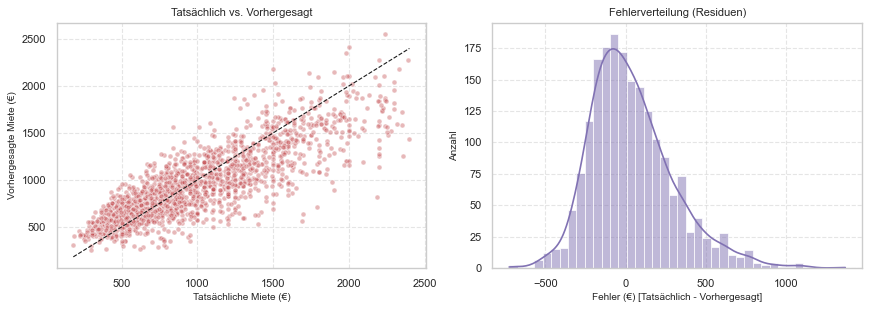

In [13]:
# 🔍 Aufgabe 10: Visualisierungen (angepasst für Log-Transformation)

# Verwenden Sie y_pred_log, das in der vorherigen Zelle berechnet wurde
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# 📉 Fehler in Euro berechnen
errors_original = y_test_original - y_pred_original

# Tatsächliche vs. Vorhergesagte Werte
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Plot 1: Scatter (mit den Originalwerten in €)
axes[0].scatter(y_test_original, y_pred_original, alpha=0.4, edgecolors='w', color='#C44E52', s=20)
axes[0].plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=1)
axes[0].set_title('Tatsächlich vs. Vorhergesagt', fontsize=10)
axes[0].set_xlabel('Tatsächliche Miete (€)', fontsize=9)
axes[0].set_ylabel('Vorhergesagte Miete (€)', fontsize=9)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Plot 2: Fehlerverteilung (mit den Fehlern in €)
sns.histplot(errors_original, bins=40, kde=True, color='#8172B3', ax=axes[1])
axes[1].set_title('Fehlerverteilung (Residuen)', fontsize=10)
axes[1].set_xlabel('Fehler (€) [Tatsächlich - Vorhergesagt]', fontsize=9)
axes[1].set_ylabel('Anzahl', fontsize=9)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



In [14]:
# 📦 Zusätzliche Modelle & Tools importieren
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np

# 🔁 Daten vorbereiten (X und y ohne Train-Test-Split)
# WICHTIG: X und y enthalten hier den kompletten Datensatz!
X = berlin_model_df.drop(columns=['baseRent'], errors='ignore')
y = berlin_model_df['baseRent'] # y ist immer noch log-transformiert

# 📊 Modelle definieren
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

# 📈 Training und Bewertung mit Kreuzvalidierung
results_cv = []
print("Starte Kreuzvalidierung für alle Modelle...")

for name, model in models.items():
    # Wir nutzen 'neg_root_mean_squared_error'. Das Ergebnis ist negativ, daher *-1.
    # cv=5 bedeutet 5-fache Kreuzvalidierung.
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

    # Die Scores sind log-transformiert. Wir müssen sie zurückrechnen, um sie in € zu verstehen.
    # HINWEIS: Eine exakte Rücktransformation des RMSE in € ist komplex.
    # Wir berechnen hier den Durchschnitt des log-RMSE und geben ihn aus.
    # Der R²-Wert ist einfacher direkt zu vergleichen.

    rmse_scores = -scores
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)

    results_cv.append({
        'Modell': name,
        'RMSE (log, avg)': round(rmse_scores.mean(), 4),
        'RMSE (log, std)': round(rmse_scores.std(), 4),
        'R² (avg)': round(r2_scores.mean(), 2),
        'R² (std)': round(r2_scores.std(), 2)
    })
    print(f"✓ {name} abgeschlossen.")

# 📋 Ergebnisse anzeigen
results_cv_df = pd.DataFrame(results_cv).sort_values(by='R² (avg)', ascending=False)
print("\n📊 Modellvergleich mit 5-facher Kreuzvalidierung:")
display(results_cv_df.style.background_gradient(cmap='YlGnBu', subset=['R² (avg)']).set_caption("Vergleich der Regressionsmodelle (Kreuzvalidiert)"))


Starte Kreuzvalidierung für alle Modelle...
✓ Linear Regression abgeschlossen.
✓ Ridge Regression abgeschlossen.
✓ Lasso Regression abgeschlossen.
✓ Decision Tree abgeschlossen.
✓ Random Forest abgeschlossen.
✓ XGBoost abgeschlossen.
✓ LightGBM abgeschlossen.

📊 Modellvergleich mit 5-facher Kreuzvalidierung:


,Modell,"RMSE (log, avg)","RMSE (log, std)",R² (avg),R² (std)
6,LightGBM,0.235200,0.016200,0.770000,0.020000
4,Random Forest,0.245600,0.016400,0.750000,0.030000
5,XGBoost,0.246600,0.017600,0.750000,0.030000
3,Decision Tree,0.280000,0.017900,0.670000,0.040000
0,Linear Regression,0.288700,0.014500,0.650000,0.030000
1,Ridge Regression,0.288600,0.014500,0.650000,0.030000
2,Lasso Regression,0.428800,0.010400,0.240000,0.010000


In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

mlp_model = make_pipeline(
    StandardScaler(),  # wichtig für neuronale Netze!
    MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
)

# ... (MLP Model fitting) ...
mlp_model.fit(X_train, y_train)
y_pred_mlp_log = mlp_model.predict(X_test) # Umbenennen zu _log

# NEU: Rücktransformation
y_pred_mlp_original = np.expm1(y_pred_mlp_log)
y_test_original = np.expm1(y_test)

# GEÄNDERT: Bewertung mit Originalwerten
mae_mlp = mean_absolute_error(y_test_original, y_pred_mlp_original)
rmse_mlp = np.sqrt(mean_squared_error(y_test_original, y_pred_mlp_original))
r2_mlp = r2_score(y_test_original, y_pred_mlp_original)

print(f"MLP Regressor – MAE: {mae_mlp:.2f} €, RMSE: {rmse_mlp:.2f} €, R²: {r2_mlp:.2f}")


MLP Regressor – MAE: 183.97 €, RMSE: 256.15 €, R²: 0.70


In [16]:
from sklearn.model_selection import GridSearchCV

# 🔧 Hyperparameter-Raum definieren
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# 🧠 Modellinitialisierung
rf = RandomForestRegressor(random_state=42)

# 🔍 GridSearchCV Setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 🚀 Training starten
grid_search.fit(X_train, y_train)

# 📈 Ergebnisse ausgeben
print("\n✅ Beste Parameterkombination:")
print(grid_search.best_params_)

print("\n📊 Bestes RMSE (negativ):")
print(-grid_search.best_score_)

# 📊 Modellbewertung auf Testdaten
best_rf = grid_search.best_estimator_
y_pred_best_log = best_rf.predict(X_test) # Vorhersage ist log-transformiert

# NEU: Rücktransformation
y_pred_best_original = np.expm1(y_pred_best_log)
y_test_original = np.expm1(y_test)

# GEÄNDERT: Metriken mit Originalwerten berechnen
mae_best = mean_absolute_error(y_test_original, y_pred_best_original)
rmse_best = np.sqrt(mean_squared_error(y_test_original, y_pred_best_original))
r2_best = r2_score(y_test_original, y_pred_best_original)

print(f"\n🎯 Getunter Random Forest:\nMAE: {mae_best:.2f} € | RMSE: {rmse_best:.2f} € | R²: {r2_best:.2f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits

✅ Beste Parameterkombination:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}

📊 Bestes RMSE (negativ):
0.24146989535389776

🎯 Getunter Random Forest:
MAE: 160.61 € | RMSE: 224.05 € | R²: 0.77


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
import numpy as np
import pandas as pd

# 🔧 Hyperparameter-Raum definieren
param_dist = {
    'n_estimators': randint(200, 600),
    'max_depth': randint(10, 40),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# 🎯 Random Forest initialisieren
rf = RandomForestRegressor(random_state=42)

# 🔍 RandomizedSearchCV Setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# 🚀 Training starten
random_search.fit(X_train, y_train)

# 📋 Beste Parameter
print("\n✅ Beste Parameterkombination (RandomizedSearchCV):")
print(random_search.best_params_)

# 📉 Ergebnis auf Testdaten berechnen
best_rf_random = random_search.best_estimator_
y_pred_random_log = best_rf_random.predict(X_test) # Umbenennen zu _log

# NEU: Rücktransformation
y_pred_random_original = np.expm1(y_pred_random_log)
y_test_original = np.expm1(y_test)

# GEÄNDERT: Bewertung mit Originalwerten
mae_rand = mean_absolute_error(y_test_original, y_pred_random_original)
rmse_rand = np.sqrt(mean_squared_error(y_test_original, y_pred_random_original))
r2_rand = r2_score(y_test_original, y_pred_random_original)

print(f"\n🎯 Random Forest (Randomized Tuned):\nMAE: {mae_rand:.2f} € | RMSE: {rmse_rand:.2f} € | R²: {r2_rand:.2f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits

✅ Beste Parameterkombination (RandomizedSearchCV):
{'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 559}

🎯 Random Forest (Randomized Tuned):
MAE: 160.24 € | RMSE: 223.54 € | R²: 0.77


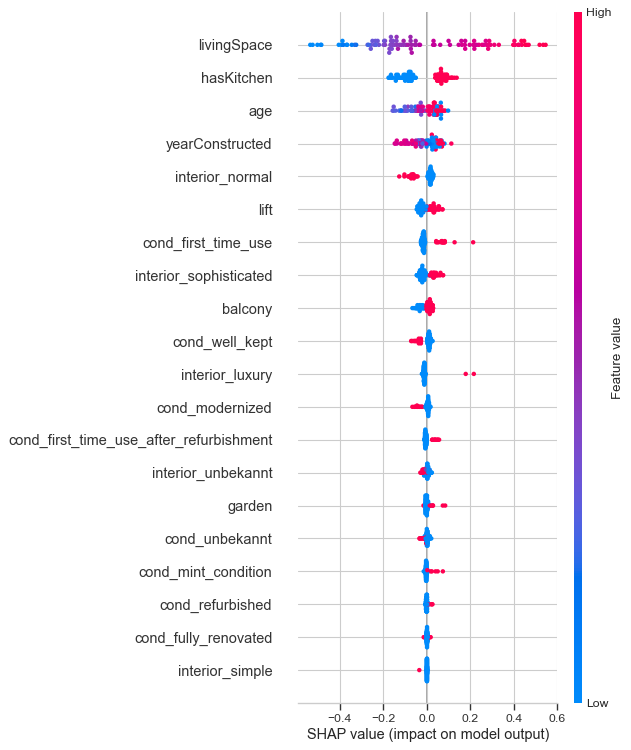

In [18]:
import shap

# X_test wieder in einen DataFrame mit den korrekten Spaltennamen umwandeln
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Auf 100 Stichproben beschränken für schnellere Berechnung
X_test_shap = X_test_df.iloc[:100]

# SHAP-Erklärer
explainer = shap.TreeExplainer(best_rf_random)

# SHAP-Werte berechnen
shap_values = explainer.shap_values(X_test_shap)

# Summary Plot anzeigen (jetzt mit korrekten Feature-Namen)
shap.summary_plot(shap_values, X_test_shap, plot_type="dot")
